## PCA plot

In [6]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [35]:
X= pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                   columns=['a', 'b', 'c'])
y=[1, 2, 1]

In [17]:
pca = PCA(n_components=3)
pca.fit_transform(X)
pca.explained_variance_ratio_

array([1.00000000e+00, 1.44470466e-34, 0.00000000e+00])

In [24]:
pca = PCA(n_components=2)

#pca.explained_variance_ratio_

array([[ 5.19615242e+00,  6.24556048e-17],
       [-0.00000000e+00, -0.00000000e+00],
       [-5.19615242e+00,  6.24556048e-17]])

In [30]:
df=pd.DataFrame(pca.fit_transform(X))
df.columns=[f'PCA_{column}'  for column in df.columns]
df

,PCA_0,PCA_1
0,5.196152,6.245560e-17
1,-0.000000,-0.000000e+00
2,-5.196152,6.245560e-17


In [25]:
pca.components_

array([[-0.57735027, -0.57735027, -0.57735027],
       [ 0.81649658, -0.40824829, -0.40824829]])

In [ ]:
def plot_pca(X,y,n_components):
    pca = PCA(n_components=n_components)
    df=pd.DataFrame(pca.fit_transform(X))
    df.columns=[f'PCA_{column}'  for column in df.columns]
    if n_components=2:
        pass
    elif n_components=2:
        pass
    elif n_components=3:
        pass
    else:
        pass
    return pca

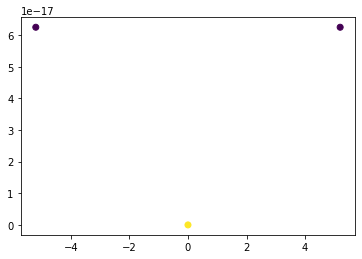

In [36]:
import numpy as np
import matplotlib.pyplot as plt


plt.scatter(df.iloc[:,0],df.iloc[:,1],  c=y)

In [31]:
y=[1, 2, 3]

## K-means

In [138]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [236]:
def cluster(X,y,k_range):
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(X)
    kmeans_per_k = [KMeans(n_clusters=k, random_state=0).fit(scaled_features) for k in k_range]
    inertias = [model.inertia_ for model in kmeans_per_k]
    silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k]
    #
    plt.figure(figsize=(8, 3.5))
    plt.plot(k_range, inertias, "bo-")
    plt.xlabel("$k$", fontsize=14)
    plt.ylabel("Inertia", fontsize=14)
    plt.axis([k_range.start, k_range.stop-1, 0, max(inertias)])
    plt.show()
    #    
    plt.figure(figsize=(8, 3))
    plt.plot(k_range, silhouette_scores, "bo-")
    plt.xlabel("$k$", fontsize=14)
    plt.ylabel("Silhouette score", fontsize=14)
    plt.axis([k_range.start, k_range.stop-1, min(silhouette_scores)-0.1, max(silhouette_scores)+0.1])
    plt.show()
    
    opt_k=list(k_range)[np.argmax(silhouette_scores)]
    opt_df=KMeans(n_clusters=opt_k, random_state=0).fit(scaled_features).labels_
    df_out=pd.DataFrame({'target':y,'cluster':opt_df})
    display(pd.crosstab(df_out['target'], df_out['cluster'], normalize='index'))
    return df_out

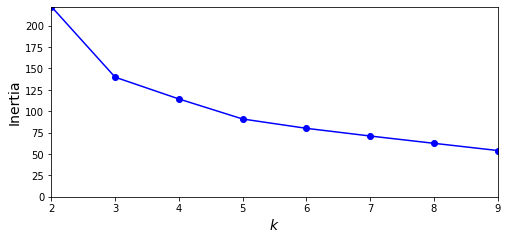

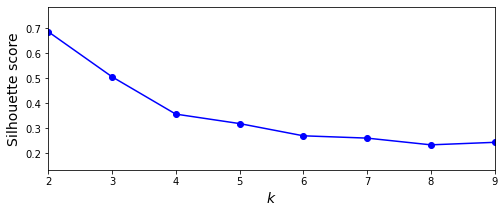

cluster,0,1
target,,
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0


In [237]:
x=cluster(X,y,range(2,10))

## Baseline model pipeline

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from statistics import mean 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, KFold

In [232]:
from sklearn.datasets import load_iris
iris = load_iris()
X=iris.data
y=iris.target

In [233]:
# preprocessing
def preprocess(X):   
    cat_cols=X.select_dtypes(include=['object'])
    dfs=[X]
    for column in cat_cols:
        df_dummies=pd.get_dummies(X, columns=[column], prefix=[f'{column}'])
        dfs.append(df_dummies)
    df=pd.concat(dfs,axis=1).drop(cat_cols,axis=1)
    return df

In [128]:
#preprocess(X)
n_estimators=100
scoring='accuracy'
cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
clf_models=[DecisionTreeClassifier(random_state=0),
            RandomForestClassifier(n_jobs=-1,n_estimators=n_estimators,random_state=0),
            LGBMClassifier(n_jobs=-1,n_estimators=n_estimators,random_state=0),
            Pipeline([('scaler', StandardScaler()), ('Log', LogisticRegression(n_jobs=-1,solver='lbfgs',multi_class='auto'))])
           ]
#TODO
# reg_models=[ 
#             ]
# cv=KFold(n_splits =5, shuffle = True, random_state = 0)
models=[]
scores=[]
for clf in clf_models:
    score=mean(cross_val_score(clf, X, y, scoring=scoring, cv=cv))
    models.append(clf.__class__.__name__)
    scores.append(score)
models_df=pd.DataFrame(scores, index=models, columns=['score']).sort_values('score',ascending=False)
models_df